# Uwaga!!!

Do zrozumienia tego notebooka będzie potrzebna podstawowa znajomość wektorów, macierzy, pochodnych

# Regresja liniowa

- Regresja liniowa to algorytm uczenia maszynowego oparty na uczeniu nadzorowanym.

- Zadaniem regresji liniowej jest po prostu dopasowanie prostej linii do danych. 

- Regresja modeluje docelową wartość przewidywania na podstawie zmiennych niezależnych.

- Regresja liniowa przyjmuje założenie, że związek między cechami a wartością przewidywaną jest mniej więcej liniowy.

## Wykres prostej regresji liniowej

Regresja liniowa wykonuje zadanie przewidywania wartości zmiennej zależnej `y` na podstawie danej zmiennej niezależnej `X`. 

Tak więc ta technika regresji znajduje liniową zależność między `X` (dane wejściowe) i `y` (dane wyjściowe). Stąd nazwa to Regresja liniowa.

Linia regresji jest najlepiej dopasowaną linią dla naszego modelu.

![wykres](images/wykres_regresji_liniowej.jpg)

## Równanie prostej z współczynikami

![funkcja_hipotezy](images/Funkcja_hipotezy.png)

## Rówanie ogólne regresji liniowej

![rownianie_regresji_liniowej](images/rownianie_regresji_liniowej.png)

## Funkcja kosztu

Funkcja kosztu służy do oceniania dokładności naszego modelu.

W tym notebooku bedziemy operować głównie błedzie średniokwadratowym (mean square error - **MSE**) 

![funkcja_kosztu](images/funkcja_kosztu.png)

gdzie:

- `m` to liczba przypadków testowych
- `h(xi)` wartość przewidziana przez model
- `yi` to wartość którą chcemy przewidzieć
- `theta0` i `theta1` parametry dla których obliczamy funckje kosztu

# Importuje potrzebne bibloteki

In [143]:
import numpy as np
import pandas as pd

#Bibloteki do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

# Model regresji liniowej z bibloteki scikit-learn
from sklearn.linear_model import LinearRegression, SGDRegressor

#Display the animation...
import io
import base64
from IPython.display import HTML

## Funkcje do generowania danych

Funkcja `np.random.rand` generuje tablice liczb z przediału od 0 do 1.
    
Funkcja `get_X()` zwraca tablice 100 liczb z przedziału od 0 do 2.
    
Będą to nasze `X`

Funkcja `np.random.randn` generuje tablice liczb z standaryzowanego rozkładu normalnego
    
Funkcja `get_y(X)` zwraca tablice 100 liczb z przedziału od 0 do 2
    
Będą to nasze `y`

In [144]:
def get_X():
    tablica = np.random.rand(100, 1)
    
    return 2 * tablica


def get_y(X):
    tablica = np.random.randn(100, 1)
    
    return 3 + 5 * X + tablica


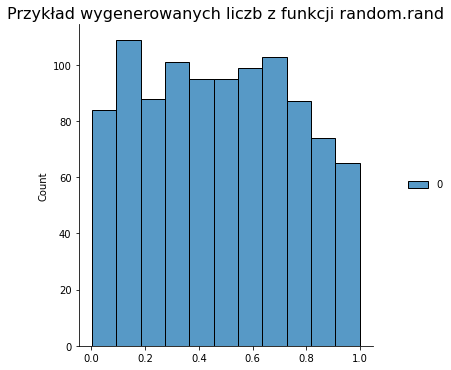

In [145]:
sns.displot(np.random.rand(1000, 1))
plt.title('Przykład wygenerowanych liczb z funkcji random.rand', size=16)
plt.show();

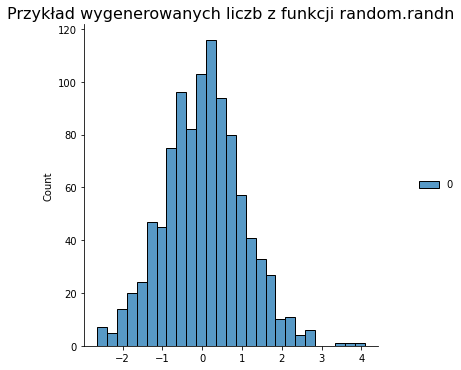

In [146]:
sns.displot(np.random.randn(1000, 1))
plt.title('Przykład wygenerowanych liczb z funkcji random.randn', size=16)
plt.show();

## Generowanie danych

In [147]:
X = get_X()
y = get_y(X)

In [148]:
# Kopie danych
X_wykres = X.copy()
y_wykres = y.copy()

## Wykres punktowy danych

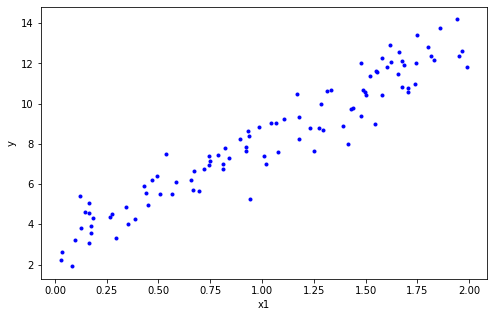

In [149]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.show()

# Regresja liniowa z biboteki Scikit-Learn GDB

### Inicjalizujemy model Regresji liniowej z biboteki Scikit-Learn

In [150]:
lin_reg = LinearRegression()

### Trenujemy model na wygenerowanych danych,
czyli w tym przypadku dopasowujemy parametry tak aby prostą była jak najbardziej dopasowana do danych

In [151]:
lin_reg.fit(X_wykres, y)

LinearRegression()

In [152]:
print('theta0 = ', lin_reg.intercept_[0])
print('theta1 = ', lin_reg.coef_[0][0])

theta0 =  3.004484536617837
theta1 =  5.109554471898571


In [153]:
print("Równanie prostej regresji wynosi:\ny = {:.2f} + {:.2f}x".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

Równanie prostej regresji wynosi:
y = 3.00 + 5.11x


### Rysuje prostą regresji na danych 

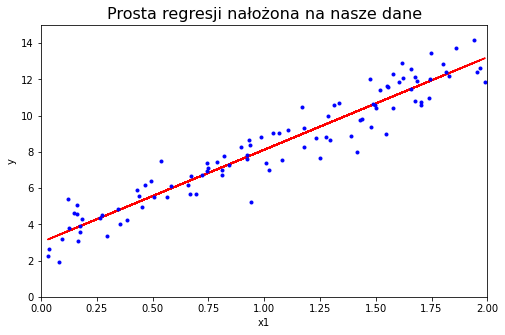

In [154]:
lin_y = lin_reg.predict(X)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, lin_y, 'r-')
plt.plot(X, y, 'b.')
plt.title('Prosta regresji nałożona na nasze dane', size=16)
plt.axis([0, 2, 0, 15])
plt.show()

# Regresja liniowa - Metoda gradientu prostego

Zaimplementujemy regresje liniową za pomocą wsadowego gradientu prostego

## Metoda gradientu prostego

- Jest algorytmem optymalizacyjnym służącym do znajdowania rozwiązań dla szerokiej gamy problemów.
- Koncepcja polega na wielokrotnym poprawianiu parametrów w celu minimalizowania funkcji kosztu.
- Ważnym elementem jest romiar kroków, określanych jako **współczynnik uczenia** (learning rate)

![](images/gradient_descent.jpeg)

Link do poczytania:
- https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/?ref=lbp

## Przekształcamy nasze pod operacje macierzowe

In [155]:
X = np.hstack((np.ones((X.shape[0],1)), X))
y = np.reshape(y, (100,1))

## Funkcja hipotezy
Służy ona do wyliczania wartość przewidywanych - `y` dla obecnych parametrów `theta`

![funkcja_hipotezy](images/Funkcja_hipotezy.png)

In [156]:
def h(x,theta):
    return np.dot(x, theta)

## Funkcja kosztu:
Wykorzystuje się ją do oceniania jakości naszego modelu

W tym przypadku jest to średni bład kwadratowy (`MSE`)

![funkcja_kosztu](images/funkcja_kosztu.png)

In [157]:
def funkcja_kosztu(X, y, theta):
    m = y.shape[0]
    err = h(X, theta) - y
    return 1/(2*m) * np.dot(err.T, err)

Dodatkowo będzie nam potrzebna pochodna cząstkowej funkcji kosztu.

Jest ona wykorzystana przy liczeniu kroku gradientu prostego

In [158]:
def pochodna_funkcji_kosztu(X, y, theta):
    m = y.shape[0]
    err = h(X, theta) - y
    return (1/m) * np.dot(X.T, err)

In [159]:
def rysuj_koszt(costs, liczba_krokow):
    costs = [x[0][0] for x in costs] 
    plt.figure(figsize=(15,8))
    plt.xlabel('Liczba kroków')
    plt.ylabel('Funckja kosztu')
    sns.lineplot(x=np.array(range(liczba_krokow)), y=costs, linewidth = "5", color ='m')
    plt.title('Wykres funkcji kosztu wzgledem ilości kroków', size=16)
    plt.show()

## Algorytm wsadowy gradientu prostego
Każdy parametr (theta) aktualizuję obliczając pochodną cząstkową `funkcji kosztu` pomnożoną przez `wspolczynik_uczenia`

![Algorytm_gradientu_prostego](images/Algorytm_gradientu_prostego.png)

`Liczba kroków` oznacza liczbę iteracji aktualizacji parametrów `theta`.

Im więcej tym bliżej dojdziemy do minimum globalnego funkcji kosztu.

In [160]:
def metoda_wsadowego_gradientu_prostego(X, y, theta, wspolczynik_uczenia=0.1, liczba_krokow=10):
    costs = []
    thetas = [theta]
    for i in range(liczba_krokow):
        koszt = funkcja_kosztu(X, y, theta)
        theta = theta - (wspolczynik_uczenia * pochodna_funkcji_kosztu(X, y, theta))
        
        costs.append(koszt)
        thetas.append(theta)
        
    return thetas, costs

In [161]:
theta = np.zeros((X.shape[1], 1))
wspolczynik_uczenia = 0.1
liczba_krokow = 200

thetas, costs = metoda_wsadowego_gradientu_prostego(X, y, theta, wspolczynik_uczenia, liczba_krokow)
theta = thetas[-1]

print("Wsadowy_gradient_prosty: y = {:.2f} + {:.2f}x".format(theta[0][0], theta[1][0]))

Wsadowy_gradient_prosty: y = 3.04 + 5.08x


## Funkcja kosztu stopniowo maleje w każdej następnym kroku gradientu prostego

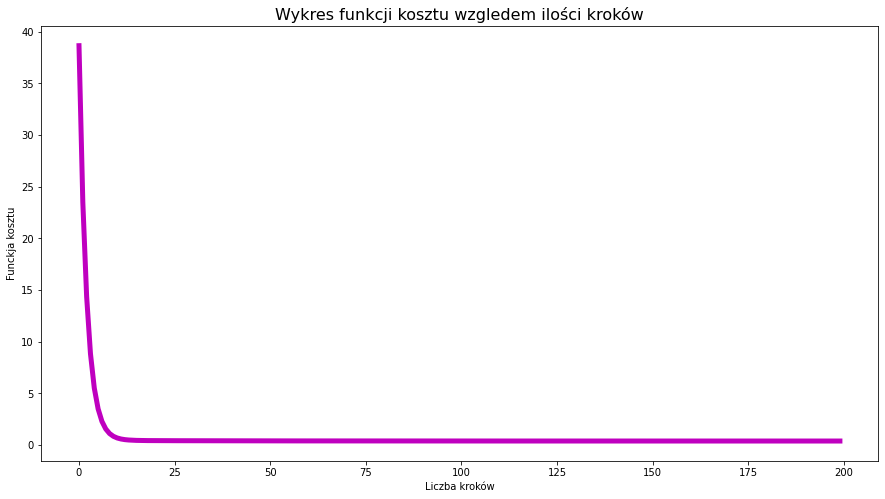

In [162]:
rysuj_koszt(costs, liczba_krokow)

## Wizualizujemy naszą prostą

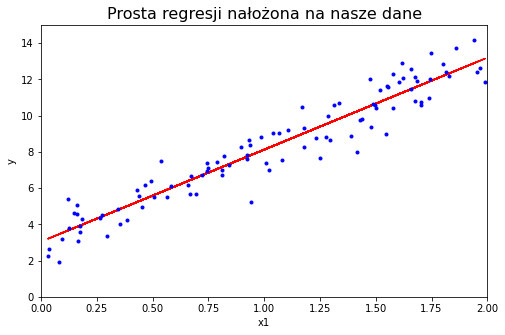

In [163]:
lin_y = h(X, theta)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X_wykres, lin_y, 'r-')
plt.plot(X_wykres, y, 'b.')
plt.title('Prosta regresji nałożona na nasze dane', size=16)
plt.axis([0, 2, 0, 15])
plt.show()

## Animacja przedstawiające zmieniającą się prostą dopasowania z kosztem uczenia


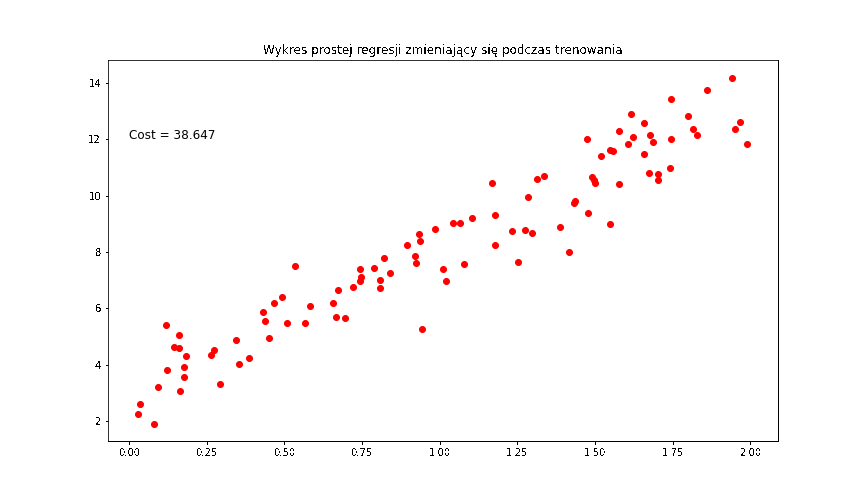

In [164]:
fig = plt.figure(figsize=(12, 7))
ax = plt.axes()
plt.title('Wykres prostej regresji zmieniający się podczas trenowania')
plt.scatter(X_wykres, y, color='r')
line, = ax.plot([], [], lw=2)
annotation = ax.text(0, 12, s='', fontsize='large')
annotation.set_animated(True)
plt.close()

def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

def animate(i):
    x = np.linspace(0, 2, 200)
    y = thetas[i][1]*x + thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.3f' % (costs[i]))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=0, blit=True)

anim.save('images/animation.gif', writer='imagemagick', fps = 30)

filename = 'images/animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# Regresja liniowa równanie normalne

![](images/rownanie_normalne.jpg)

In [165]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_best)

[[3.00448454]
 [5.10955447]]


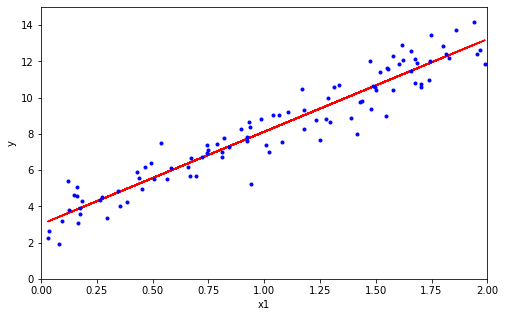

In [166]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X_wykres, h(X, theta_best), 'r-')
plt.plot(X_wykres, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# Regresja liniowa z biboteki Scikit-Learn SGD

### Inicjalizujemy model Regresji liniowej z biboteki Scikit-Learn

In [167]:
lin_reg = SGDRegressor()

### Trenujemy model na wygenerowanych danych,
czyli w tym przypadku dopasowujemy parametry tak aby prostą była jak najbardziej dopasowana do danych

In [168]:
lin_reg.fit(X_wykres, y_wykres.ravel())

SGDRegressor()

In [169]:
print('theta0 = ', lin_reg.intercept_[0])
print('theta1 = ', lin_reg.coef_[0])

theta0 =  3.3696247893870175
theta1 =  4.8033304028485215


### Rysuje prostą regresji na danych

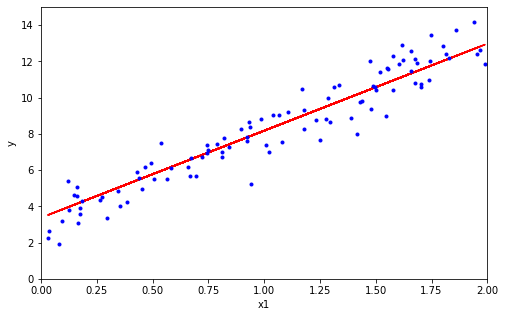

In [170]:
y_pred = lin_reg.predict(X_wykres)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X_wykres, y_pred, 'r-')
plt.plot(X_wykres, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# Regresja liniowa - Stochastyczny spadek wzdłuż gradientu

Zaimplementujemy regresje liniową za pomocą stochastyczny spadku wzdłuż gradientu prostego

## Stochastyczny spadek wzdłuż gradientu

- w odróżnieniu od wsadowego gradientu prostego podczas każdego przebiegu dobierana jest losowa próbka danych, za pomocą której dobierane są wyliczane gradienty.
- Algorytm jest dużo szybszy od wsadowego gradientu prostego
- Możliwość użycia na dużych zestawach danych
- Możliwość trenowania online
- Nigdy nie osiąga minimum
- bardziej odporny na minimum lokalne

## Wykres kosztu Wsadowego gradnietu prostego

![image.png](images/gdp.png)

## Wykres kosztu Stoachastycznego spadku wzdłuż gradientu

![image.png](images/sgd.jpg)


In [171]:
def harmonogram_uczenia(t):
    return t0 / (t + t1)

In [172]:
def stochastyczny_spadek_wzdłuż_gradientu(X, y, theta, liczba_krokow=10):
    costs = []
    thetas = [theta]
    m = y.shape[0]
    
    for krok in range(liczba_krokow):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            koszt = funkcja_kosztu(X_i, y_i, theta)
            wspolczynik_uczenia = harmonogram_uczenia(krok * m + i)

            theta = theta - (wspolczynik_uczenia * pochodna_funkcji_kosztu(X, y, theta))

        costs.append(koszt)
        thetas.append(theta)
        
    return thetas, costs

In [173]:
t0 = 5
t1 = 50
wspolczynik_uczenia = 0.1
liczba_krokow = 20
theta = np.zeros((X.shape[1], 1))

thetas, costs = stochastyczny_spadek_wzdłuż_gradientu(X, y, theta, liczba_krokow)
theta = thetas[-1]

print("Stochastyczny spadek_wzdłuż gradientu: y = {:.2f} + {:.2f}x".format(theta[0][0], theta[1][0]))

Stochastyczny spadek_wzdłuż gradientu: y = 3.05 + 5.07x


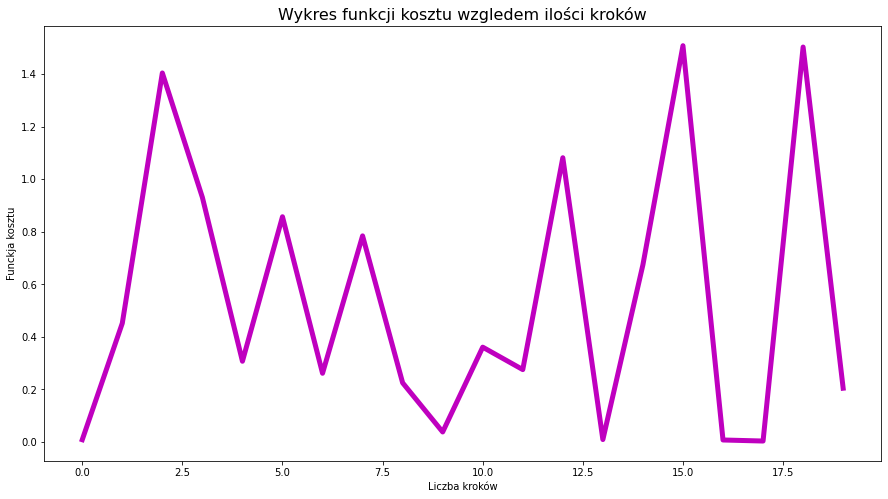

In [174]:
rysuj_koszt(costs, liczba_krokow)

# Odnośniki i linki:
- https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/
- https://miroslawmamczur.pl/jak-dziala-regresja-liniowa-i-czy-warto-ja-stosowac/
- https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/
- https://medium.datadriveninvestor.com/machine-learning-101-part-1-24835333d38a
- https://www.geeksforgeeks.org/ml-linear-regression/?ref=lbp
- https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/?ref=lbp
- https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/